In [35]:
#connect to influxdb on localhost
#token whVmtiLViagPA8zCpz4-ItfX56GPhoGMUg4s9u-kx7fXmZTNcVE9xWNbLoTXB0c347vMG8vUxxIAKDPJdsFO6A==
#org dsi
#bucket s-p-500
#bucket_id 5ab39a6efe08bcae
#url http://localhost:8086

from influxdb_client import InfluxDBClient, Point, WritePrecision
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS

# You can generate a Token from the "Tokens Tab" in the UI
token = "whVmtiLViagPA8zCpz4-ItfX56GPhoGMUg4s9u-kx7fXmZTNcVE9xWNbLoTXB0c347vMG8vUxxIAKDPJdsFO6A=="
org = "dsi"
bucket = "s-p-test"
client = InfluxDBClient(url="http://localhost:8086", token=token)

write_api = client.write_api(write_options=SYNCHRONOUS)

In [15]:
p = Point("my_measurement").tag("location", "Prague").field("temperature", 25.3)
write_api.write(bucket=bucket, org=org, record=p)

#close connection
client.close()

In [36]:
#write for 500 points

for i in range(10):
    p = Point("my_measurement").tag("location", "Prague").field("temperature", 25.3)
    write_api.write(bucket=bucket, org=org, record=p)


In [21]:
# Querying data
query_api = client.query_api()
query = 'from(bucket:"s-p-test")\
|> range(start: -10m)\
|> filter(fn:(r) => r._measurement == "my_measurement")\
|> filter(fn:(r) => r.location == "Prague")\
|> filter(fn:(r) => r._field == "temperature")'

result = query_api.query(query, org=org)

In [25]:
results = []
for table in result:
  for record in table.records:
    results.append((record.get_field(), record.get_value()))

print(results)

[('temperature', 25.3), ('temperature', 25.3)]


               value
date                
2000-01-01 -0.372762
2000-01-02 -0.990635
2000-01-03 -0.458137
2000-01-04 -0.777463
2000-01-05 -0.361492
...              ...
2002-09-22  7.283904
2002-09-23  8.050129
2002-09-24  8.213655
2002-09-25  7.603650
2002-09-26  7.768452

[1000 rows x 1 columns]


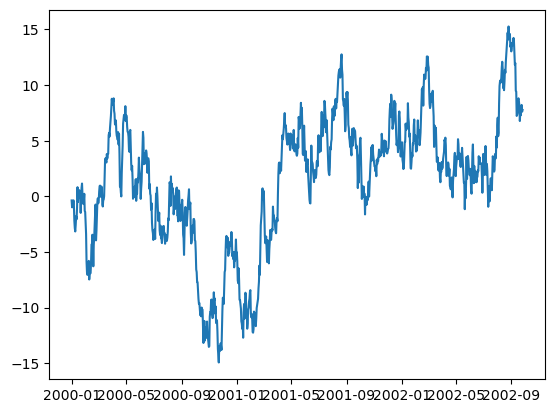

In [32]:
#create dataframe wich memics a timeseries of a stock
import pandas as pd
import numpy as np
import datetime
import random

# Create a dataframe with a column
df = pd.DataFrame({'value': np.random.randn(1000)})
# Add a column with a datetime index
df['date'] = pd.date_range('1/1/2000', periods=1000)
# Set the datetime column as the index
df = df.set_index('date')
# Create a column with a random walk
df['value'] = df['value'].cumsum()


print(df)
#plot df
import matplotlib.pyplot as plt
plt.plot(df.index, df['value'])
plt.show()

In [45]:
import pandas as pd

records = pd.DataFrame(
    data=[
        ["0", 25.3, 1657729063],
    	  ["0", 25.4, 1657729078],
    	  ["0", 25.2, 1657729093],
    ],
    columns=["core", "temp", "timestamp"],
)

records

,core,temp,timestamp
0,0,25.3,1657729063
1,0,25.4,1657729078
2,0,25.2,1657729093


In [40]:

with InfluxDBClient.from_config_file("config.toml") as client:
    with client.write_api() as writer:
        writer.write(
        	bucket="testing",
        	record=records,
        	data_frame_measurement_name="cpu",
        	data_frame_tag_columns=["core"],
        )

The batch item wasn't processed successfully because: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json; charset=utf-8', 'X-Influxdb-Build': 'OSS', 'X-Influxdb-Version': 'v2.6.1', 'X-Platform-Error-Code': 'not found', 'Date': 'Fri, 20 Jan 2023 14:10:09 GMT', 'Content-Length': '61'})
HTTP response body: {"code":"not found","message":"bucket \"testing\" not found"}



In [47]:
token = "whVmtiLViagPA8zCpz4-ItfX56GPhoGMUg4s9u-kx7fXmZTNcVE9xWNbLoTXB0c347vMG8vUxxIAKDPJdsFO6A=="
org = "dsi"
bucket = "s-p-test"
client = InfluxDBClient(url="http://localhost:8086", token=token)

write_api = client.write_api(write_options=SYNCHRONOUS)

write_api.write(
        org="dsi",
        bucket="testing",
        record=records,
        data_frame_measurement_name="cpu",
        data_frame_tag_columns=["core"]
    )

#close connection
client.close()

In [58]:
#get json from https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=5LZM13OZQMZFPU92

import requests
import json
import pandas as pd
import numpy as np
import datetime

url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=5LZM13OZQMZFPU92"
response = requests.get(url)
data = response.json()

#extract "Meta Data" and every "Time Series (5min)" entry
meta_data = data["Meta Data"]
time_series = data["Time Series (5min)"]

#convert time_series to dataframe
df = pd.DataFrame.from_dict(time_series, orient='index')

# #print every row

# for index, row in df.iterrows():
#     print(row)

#sort dataframe by index
df = df.sort_index()
df


KeyError: 'Time Series (5min)'

In [73]:
# Raw Package
import numpy as np
import pandas as pd



#Data viz
import plotly.graph_objs as go

#Data Source
import yfinance as yf

#Interval required 1 minute
data = yf.download(tickers='IBM', period='1d', interval='1m')

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Uber live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed


In [89]:
data = yf.download(tickers='IBM', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [90]:
#convert dataframe to json
a = df.to_json(orient='index')

In [85]:
type(data)
type(a)

str

In [91]:
test = pd.read_json(a, orient='index')
test

,1. open,2. high,3. low,4. close,5. volume
2023-01-18 18:25:00,140.2000,140.2400,140.2000,140.2400,776
2023-01-18 18:40:00,140.2000,140.2000,140.2000,140.2000,100
2023-01-19 06:40:00,140.1400,140.1600,140.1400,140.1600,1364
2023-01-19 07:10:00,140.1400,140.1400,140.1400,140.1400,501
2023-01-19 07:25:00,140.0500,140.0500,140.0200,140.0200,941
...,...,...,...,...,...
2023-01-19 17:35:00,140.8000,140.8000,140.6200,140.6200,524
2023-01-19 17:45:00,140.7999,140.7999,140.7999,140.7999,254
2023-01-19 18:45:00,140.6500,140.6500,140.6000,140.6400,744
2023-01-19 18:50:00,140.6200,140.6200,140.6200,140.6200,610


In [115]:
import influxdb_client
from influxdb import DataFrameClient
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client.client.write_api import ASYNCHRONOUS

#InfluxDB connection
bucket = "DSI_test"
#token ="yxk8_Or5qHZJxrhJE3SkAnTQSViQCsmrUoR0xPZd_0scy1T8FTuL1cKSTDKh1ft8Bqs3Zbt7Rwkys-FzajIVFQ=="
token ="GMbnHWGhM9p9t9mIjbc1I5KlWir8LJxBDkpMF0SiOa56f1nvLepCEN7iI_5-sR80FA8CvLmf_mHcy8Gc5XYwvA=="
org="dsi"
client = InfluxDBClient(url="http://localhost:8086", token=token, org=org)
#client = InfluxDBClient(url="http://172.19.0.2:8086", token=token, org=org)


In [93]:
data = yf.download(tickers='IBM', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [94]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-20 09:30:00-05:00,141.630005,141.630005,141.630005,141.630005,141.630005,408021
2023-01-20 09:31:00-05:00,141.580002,141.789993,141.419006,141.649994,141.649994,20861
2023-01-20 09:32:00-05:00,141.604996,141.604996,141.250000,141.350006,141.350006,9920
2023-01-20 09:33:00-05:00,141.297699,141.429993,141.210007,141.250000,141.250000,8221
2023-01-20 09:34:00-05:00,141.270004,141.320007,141.100006,141.304993,141.304993,9136
...,...,...,...,...,...,...
2023-01-20 13:05:00-05:00,140.796204,140.800003,140.750000,140.779999,140.779999,5058
2023-01-20 13:06:00-05:00,140.804993,140.830002,140.800003,140.800003,140.800003,2678
2023-01-20 13:07:00-05:00,140.791702,140.815002,140.770004,140.770004,140.770004,3930


In [116]:
with client.write_api(write_options=SYNCHRONOUS) as writer:
    writer.write(
        bucket=bucket,
        record=data,
        data_frame_measurement_name="key2",
        #data_frame_tag_columns=["symbol"],
        data_frame_field_columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"]
        )